In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/catsdogs",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(200,200), 
    batch_size=32, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


(200, 200, 3)


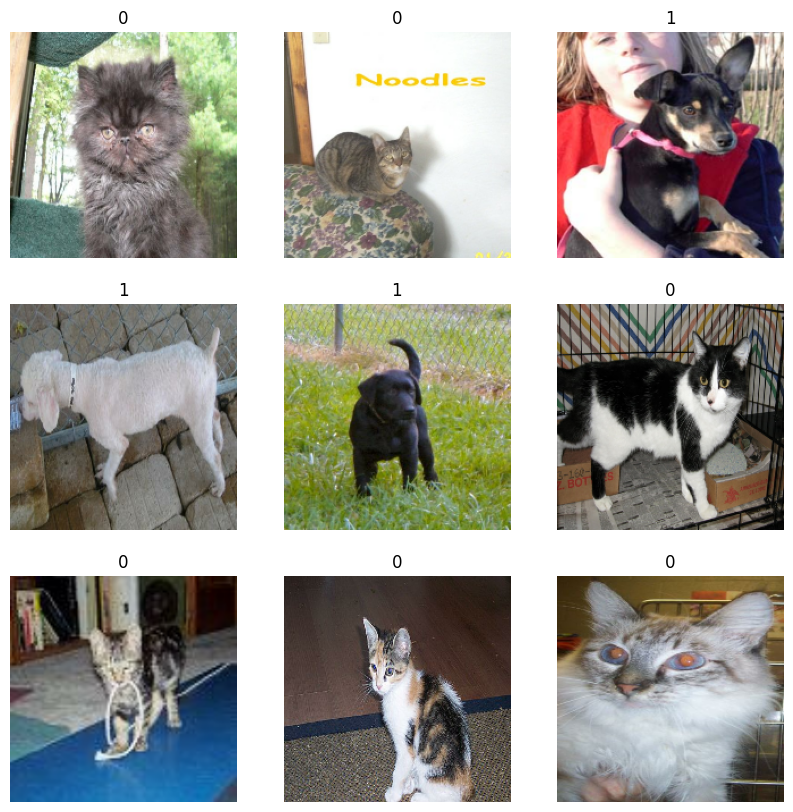

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if(i == 0):
            print((images[i].numpy().astype("uint8").shape))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
    ]
)

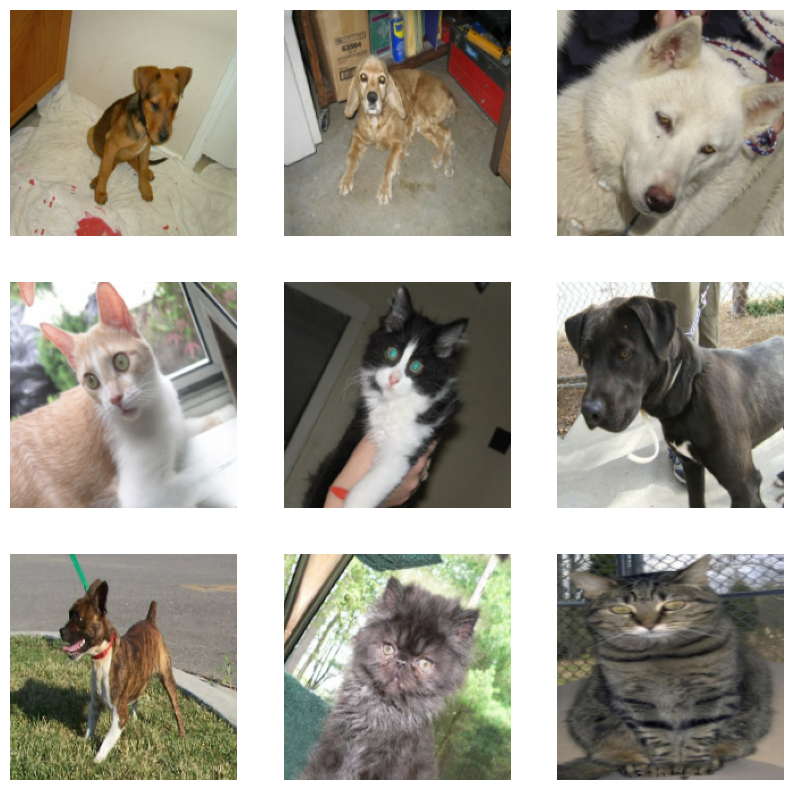

In [7]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [8]:
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label)
)

In [9]:
inputs = tf.keras.Input(shape=(200, 200, 3))
x = tf.keras.layers.Rescaling(1.0 / 255)(inputs)
x = tf.keras.layers.Conv2D(64, 3, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Conv2D(128, 4, strides=2, padding="same")(x)
x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation="relu")(x)
outputs = tf.keras.layers.Dense(2, activation="softmax")(x)
model = tf.keras.Model(inputs, outputs)

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
50/50 [==============================] - 7s 126ms/step - loss: 0.7591 - accuracy: 0.5200 - val_loss: 0.6826 - val_accuracy: 0.6175
Epoch 2/10
50/50 [==============================] - 7s 129ms/step - loss: 0.6879 - accuracy: 0.5337 - val_loss: 0.6452 - val_accuracy: 0.5450
Epoch 3/10
50/50 [==============================] - 6s 121ms/step - loss: 0.6909 - accuracy: 0.5650 - val_loss: 0.6808 - val_accuracy: 0.6975
Epoch 4/10
50/50 [==============================] - 6s 119ms/step - loss: 0.6742 - accuracy: 0.5906 - val_loss: 0.6555 - val_accuracy: 0.5600
Epoch 5/10
50/50 [==============================] - 6s 118ms/step - loss: 0.6609 - accuracy: 0.6119 - val_loss: 0.6437 - val_accuracy: 0.6050
Epoch 6/10
50/50 [==============================] - 6s 116ms/step - loss: 0.6188 - accuracy: 0.6488 - val_loss: 0.5690 - val_accuracy: 0.7075
Epoch 7/10
50/50 [==============================] - 6s 116ms/step - loss: 0.6032 - accuracy: 0.6744 - val_loss: 0.5699 - val_accuracy: 0.6925
Epoch 

In [12]:
img = tf.keras.preprocessing.image.load_img(
    "../data/catsdogs/dogs/1.jpg", target_size=(200, 200),
    
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
predictions

1/1 [==============================] - 0s 45ms/step


array([[0.6685906, 0.3314094]], dtype=float32)

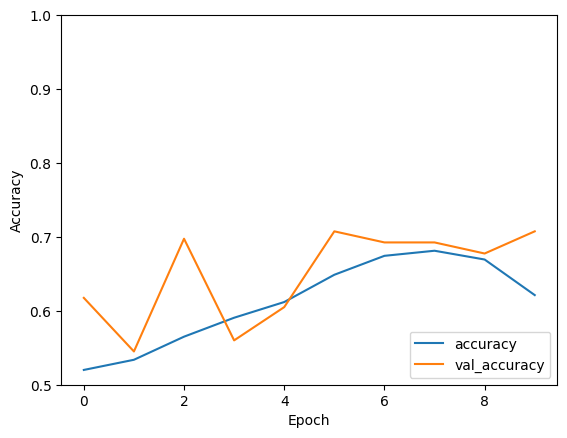

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [14]:
model.save('../models/CatsDogsModel')


INFO:tensorflow:Assets written to: ../models/CatsDogsModel/assets


INFO:tensorflow:Assets written to: ../models/CatsDogsModel/assets


In [15]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data101",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(224,224), 
    batch_size=32, 
)

Found 154 files belonging to 3 classes.
Using 124 files for training.
Using 30 files for validation.


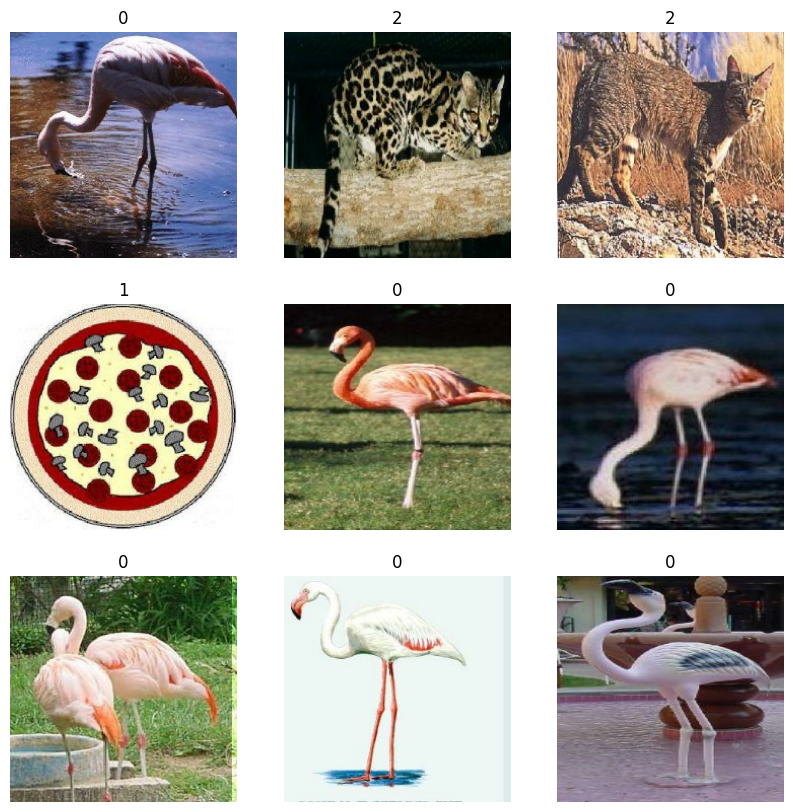

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [17]:
vgg = tf.keras.applications.VGG19(weights='imagenet', include_top=True)

In [18]:
inp = vgg.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(vgg.layers[-2].output)
model_new = tf.keras.Model(inp, out)

In [19]:
for layer in model_new.layers:
    layer.trainable = False
model_new.layers[-1].trainable = True
model_new.layers[-2].trainable = True

In [20]:
model_new.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
history_1 = model_new.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
4/4 [==============================] - 15s 4s/step - loss: 0.7026 - accuracy: 0.8548 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
4/4 [==============================] - 14s 4s/step - loss: 0.4211 - accuracy: 0.9839 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/5
4/4 [==============================] - 14s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/5
4/4 [==============================] - 15s 4s/step - loss: 0.7814 - accuracy: 0.9839 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/5
4/4 [==============================] - 15s 4s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 5.4949e-04 - val_accuracy: 1.0000


In [22]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data101/pizza/image_0007.jpg", target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new.predict(img_array)
predictions

1/1 [==============================] - 0s 200ms/step


array([[0.0000000e+00, 9.9999869e-01, 1.3708527e-06]], dtype=float32)

In [23]:
inception = tf.keras.applications.InceptionV3(weights='imagenet', include_top=True)

In [24]:
train_ds, test_ds = tf.keras.utils.image_dataset_from_directory(
    "../data/data101",
    validation_split=0.2, 
    subset="both", 
    seed=42,
    image_size=(299,299), 
    batch_size=32, 
)

Found 154 files belonging to 3 classes.
Using 124 files for training.
Using 30 files for validation.


In [25]:
inp = inception.input
new_classification_layer = tf.keras.layers.Dense(3, activation='softmax')
out = new_classification_layer(inception.layers[-2].output)
model_new2 = tf.keras.Model(inp, out)

In [26]:
for layer in model_new2.layers:
    layer.trainable = False
model_new2.layers[-1].trainable = True
model_new2.layers[-2].trainable = True

In [27]:
model_new2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history_2 = model_new2.fit(train_ds, epochs=5, validation_data=test_ds)

Epoch 1/5
4/4 [==============================] - 7s 1s/step - loss: 8.8903 - accuracy: 0.4758 - val_loss: 9.7589 - val_accuracy: 0.5000
Epoch 2/5
4/4 [==============================] - 5s 1s/step - loss: 5.9345 - accuracy: 0.5242 - val_loss: 3.9966 - val_accuracy: 0.4333
Epoch 3/5
4/4 [==============================] - 5s 1s/step - loss: 4.4610 - accuracy: 0.5565 - val_loss: 5.7054 - val_accuracy: 0.6333
Epoch 4/5
4/4 [==============================] - 5s 1s/step - loss: 3.7194 - accuracy: 0.6371 - val_loss: 3.8673 - val_accuracy: 0.4667
Epoch 5/5
4/4 [==============================] - 5s 1s/step - loss: 2.9263 - accuracy: 0.6129 - val_loss: 2.7400 - val_accuracy: 0.7333


In [29]:
img = tf.keras.preprocessing.image.load_img(
    "../data/data101/pizza/image_0007.jpg", target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model_new2.predict(img_array)
predictions

1/1 [==============================] - 1s 533ms/step


array([[2.1085057e-01, 7.8913969e-01, 9.6513604e-06]], dtype=float32)

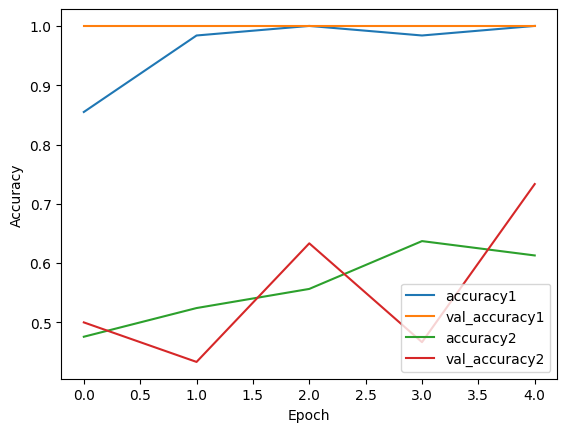

In [30]:
plt.plot(history_1.history['accuracy'], label='accuracy1')
plt.plot(history_1.history['val_accuracy'], label = 'val_accuracy1')
plt.plot(history_2.history['accuracy'], label='accuracy2')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy2')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')